In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target Account
target_user = "@BBC"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter += 1

In [5]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0258,Mon Jun 11 18:00:20 +0000 2018,0.922,0.000,0.078,1
1,0.0498,Mon Jun 11 17:31:06 +0000 2018,0.742,0.105,0.152,2
2,0.5423,Mon Jun 11 16:00:11 +0000 2018,0.696,0.000,0.304,3
3,0.5423,Mon Jun 11 15:18:53 +0000 2018,0.711,0.075,0.213,4
4,0.8908,Mon Jun 11 15:11:47 +0000 2018,0.602,0.000,0.398,5


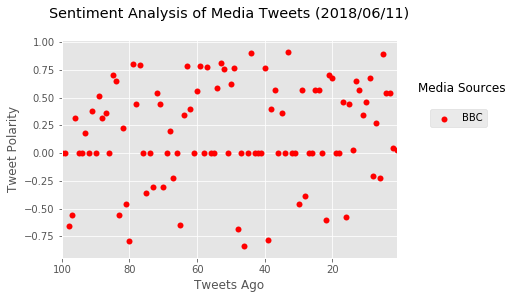

In [43]:
# Create plot
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
plt.scatter(x_vals,y_vals, marker="o", linewidth=0, color="red", edgecolor="black", label="BBC")

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y/%m/%d")
plt.title(f"Sentiment Analysis of Media Tweets ({now})\n")
plt.xlim([x_vals.max(),x_vals.min()])
plt.figtext(.95, .7, "Media Sources", fontsize=12)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(loc=(1.1,.6))
plt.show()